In [1]:
#Import library
import pandas as pd
pd.options.display.max_columns = 50

In [2]:
#Import dataset
students = pd.read_csv('StudentsPerformance.csv')

In [3]:
#Inspect dataset
print(students.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
#Rename columns
dict = {'race/ethnicity' : 'group', 'parental level of education' : 'parent_education',
        'test preparation course' : 'course', 'math score' : 'math_score',
        'reading score' : 'reading_score', 'writing score' : 'writing_score'}
students.rename(columns = dict, inplace = True)
print(students.head())

   gender    group    parent_education         lunch     course  math_score  \
0  female  group B   bachelor's degree      standard       none          72   
1  female  group C        some college      standard  completed          69   
2  female  group B     master's degree      standard       none          90   
3    male  group A  associate's degree  free/reduced       none          47   
4    male  group C        some college      standard       none          76   

   reading_score  writing_score  
0             72             74  
1             90             88  
2             95             93  
3             57             44  
4             78             75  


In [5]:
print(students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   group             1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   course            1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [6]:
print(students.shape)

(1000, 8)


In [7]:
print(students.dtypes)

gender              object
group               object
parent_education    object
lunch               object
course              object
math_score           int64
reading_score        int64
writing_score        int64
dtype: object


In [8]:
#Detect inconsistent
for col_name in list(['gender', 'group', 'parent_education', 'lunch', 'course']):
    print('\nUnique values count variable', col_name)
    print(students[col_name].value_counts())


Unique values count variable gender
female    518
male      482
Name: gender, dtype: int64

Unique values count variable group
group C    319
group D    262
group B    190
group E    140
group A     89
Name: group, dtype: int64

Unique values count variable parent_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_education, dtype: int64

Unique values count variable lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64

Unique values count variable course
none         642
completed    358
Name: course, dtype: int64


In [9]:
#Drop duplicates
students.drop_duplicates()

,gender,group,parent_education,lunch,course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
#Missing values
print('Status missing values:', students.isnull().values.any())

Status missing values: False


In [11]:
#Descriptive analysis
print(students.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


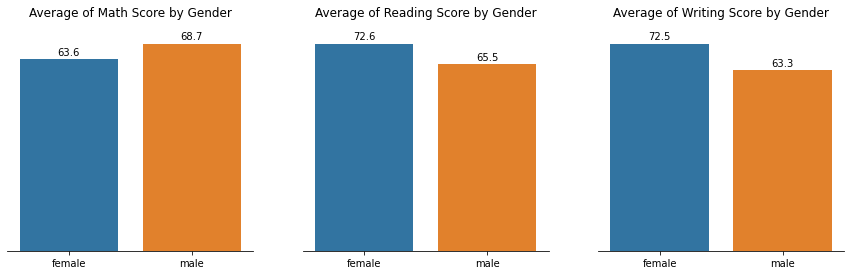

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(15,4))

plt.subplot(1,3,1)
gender_math = students.groupby(['gender'])['math_score'].mean().reset_index() 
ax = sns.barplot(x = 'gender', y = 'math_score', data = gender_math)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Math Score by Gender', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.subplot(1,3,2)
gender_reading = students.groupby(['gender'])['reading_score'].mean().reset_index() 
ax = sns.barplot(x = 'gender', y = 'reading_score', data = gender_reading)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Reading Score by Gender', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.subplot(1,3,3)
gender_writing = students.groupby(['gender'])['writing_score'].mean().reset_index() 
ax = sns.barplot(x = 'gender', y = 'writing_score', data = gender_writing)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Writing Score by Gender', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.show()

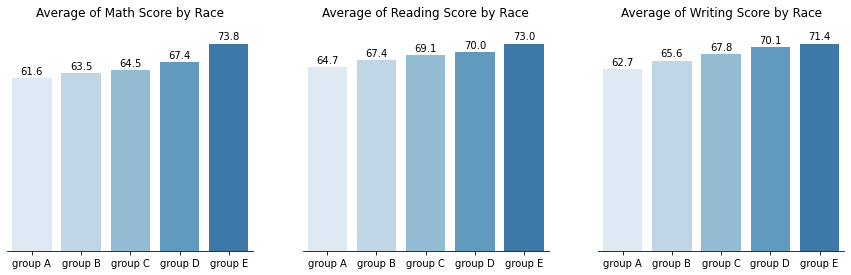

In [13]:
fig, axes = plt.subplots(figsize=(15,4))
sns.set_palette("Blues")

plt.subplot(1,3,1)
race_math = students.groupby(['group'])['math_score'].mean().reset_index() 
ax = sns.barplot(x = 'group', y = 'math_score', data = race_math)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Math Score by Race', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.subplot(1,3,2)
race_reading = students.groupby(['group'])['reading_score'].mean().reset_index() 
ax = sns.barplot(x = 'group', y = 'reading_score', data = race_reading)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Reading Score by Race', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.subplot(1,3,3)
race_writing = students.groupby(['group'])['writing_score'].mean().reset_index() 
ax = sns.barplot(x = 'group', y = 'writing_score', data = race_writing)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Writing Score by Race', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.show()

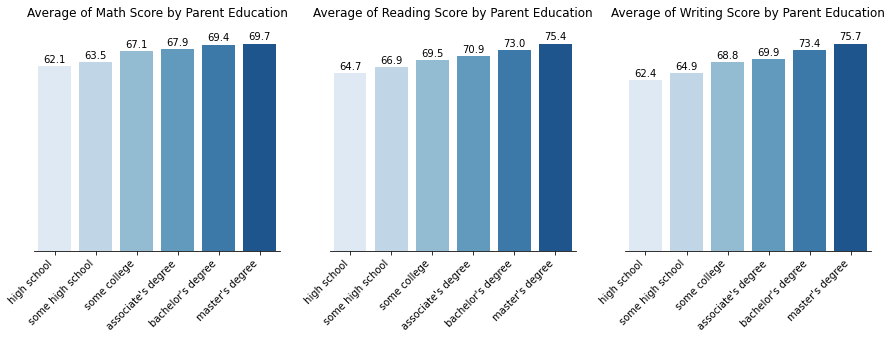

In [14]:
fig, axes = plt.subplots(figsize=(15,4))
sns.set_palette("Blues")

plt.subplot(1,3,1)
parent_math = students.groupby(['parent_education'])['math_score'].mean().reset_index() 
ax = sns.barplot(x = 'parent_education', y = 'math_score', data = parent_math,
                 order=["high school","some high school","some college","associate's degree",
                        "bachelor's degree","master's degree"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Math Score by Parent Education', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 45, ha='right')

plt.subplot(1,3,2)
parent_reading = students.groupby(['parent_education'])['reading_score'].mean().reset_index() 
ax = sns.barplot(x = 'parent_education', y = 'reading_score', data = parent_reading,
                order=["high school","some high school","some college","associate's degree",
                        "bachelor's degree","master's degree"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Reading Score by Parent Education', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 45, ha='right')

plt.subplot(1,3,3)
parent_writing = students.groupby(['parent_education'])['writing_score'].mean().reset_index() 
ax = sns.barplot(x = 'parent_education', y = 'writing_score', data = parent_writing,
                order=["high school","some high school","some college","associate's degree",
                        "bachelor's degree","master's degree"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Writing Score by Parent Education', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 45, ha='right')

plt.show()

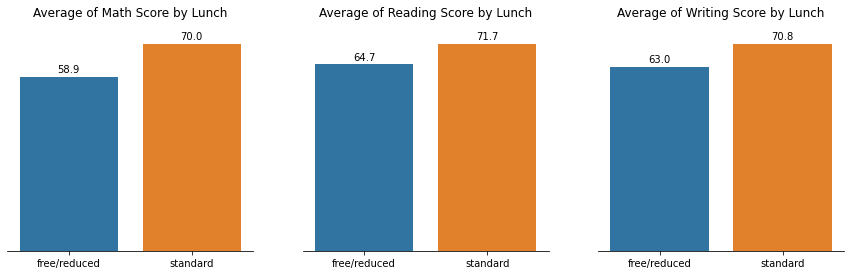

In [15]:
fig, axes = plt.subplots(figsize=(15,4))
sns.set_palette("tab10")

plt.subplot(1,3,1)
lunch_math = students.groupby(['lunch'])['math_score'].mean().reset_index() 
ax = sns.barplot(x = 'lunch', y = 'math_score', data = lunch_math)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Math Score by Lunch', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.subplot(1,3,2)
lunch_reading = students.groupby(['lunch'])['reading_score'].mean().reset_index() 
ax = sns.barplot(x = 'lunch', y = 'reading_score', data = lunch_reading)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Reading Score by Lunch', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.subplot(1,3,3)
lunch_writing = students.groupby(['lunch'])['writing_score'].mean().reset_index() 
ax = sns.barplot(x = 'lunch', y = 'writing_score', data = lunch_writing)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Writing Score by Lunch', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.show()

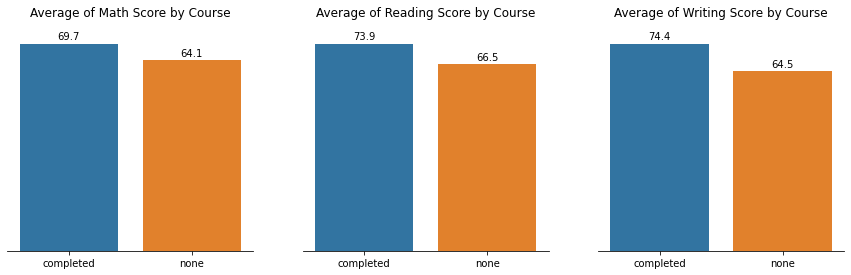

In [16]:
fig, axes = plt.subplots(figsize=(15,4))
sns.set_palette("tab10")

plt.subplot(1,3,1)
course_math = students.groupby(['course'])['math_score'].mean().reset_index() 
ax = sns.barplot(x = 'course', y = 'math_score', data = course_math)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Math Score by Course', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.subplot(1,3,2)
course_reading = students.groupby(['course'])['reading_score'].mean().reset_index() 
ax = sns.barplot(x = 'course', y = 'reading_score', data = course_reading)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Reading Score by Course', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.subplot(1,3,3)
course_writing = students.groupby(['course'])['writing_score'].mean().reset_index() 
ax = sns.barplot(x = 'course', y = 'writing_score', data = course_writing)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords = 'offset points')
plt.title('Average of Writing Score by Course', y=1.05)
plt.xlabel(None)
plt.ylabel(None)
sns.despine(left=True)
plt.yticks([], [])
plt.xticks(rotation = 0)

plt.show()